In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier ,StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-prediction-b1/train.csv
/kaggle/input/wine-quality-prediction-b1/test.csv
/kaggle/input/wine-quality-prediction-b1/sample_submissionfile.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/wine-quality-prediction-b1/train.csv')
test_data=pd.read_csv('/kaggle/input/wine-quality-prediction-b1/test.csv')

In [3]:
train_data.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,1,7.1,0.29,0.30,16.0,0.036,58.0,201.0,0.99954,3.30,0.67,9.0,5
1,2,6.8,0.23,0.31,2.8,0.047,40.0,122.0,0.99126,3.06,0.64,10.9,7
2,3,7.1,0.39,0.35,12.5,0.044,26.0,72.0,0.99410,3.17,0.29,11.6,5
3,4,6.4,0.17,0.27,9.9,0.047,26.0,101.0,0.99596,3.34,0.50,9.9,6
4,5,6.0,0.31,0.27,2.3,0.042,19.0,120.0,0.98952,3.32,0.41,12.7,7


In [4]:
test_data.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.220,0.33,2.0,0.045,31.0,101.0,0.99310,3.42,0.55,11.4
1,2,5.6,0.295,0.26,1.1,0.035,40.0,102.0,0.99154,3.47,0.56,10.6
2,3,6.6,0.170,0.36,1.9,0.036,38.0,110.0,0.99056,3.05,0.54,11.4
3,4,6.9,0.280,0.37,9.1,0.037,16.0,76.0,0.99480,3.05,0.54,11.1
4,5,7.2,0.290,0.18,8.2,0.042,41.0,180.0,0.99644,3.16,0.49,9.1


In [5]:
X = train_data.drop(['ID','Quality'], axis=1)
y = train_data['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,shuffle=True,stratify=y,random_state=42)

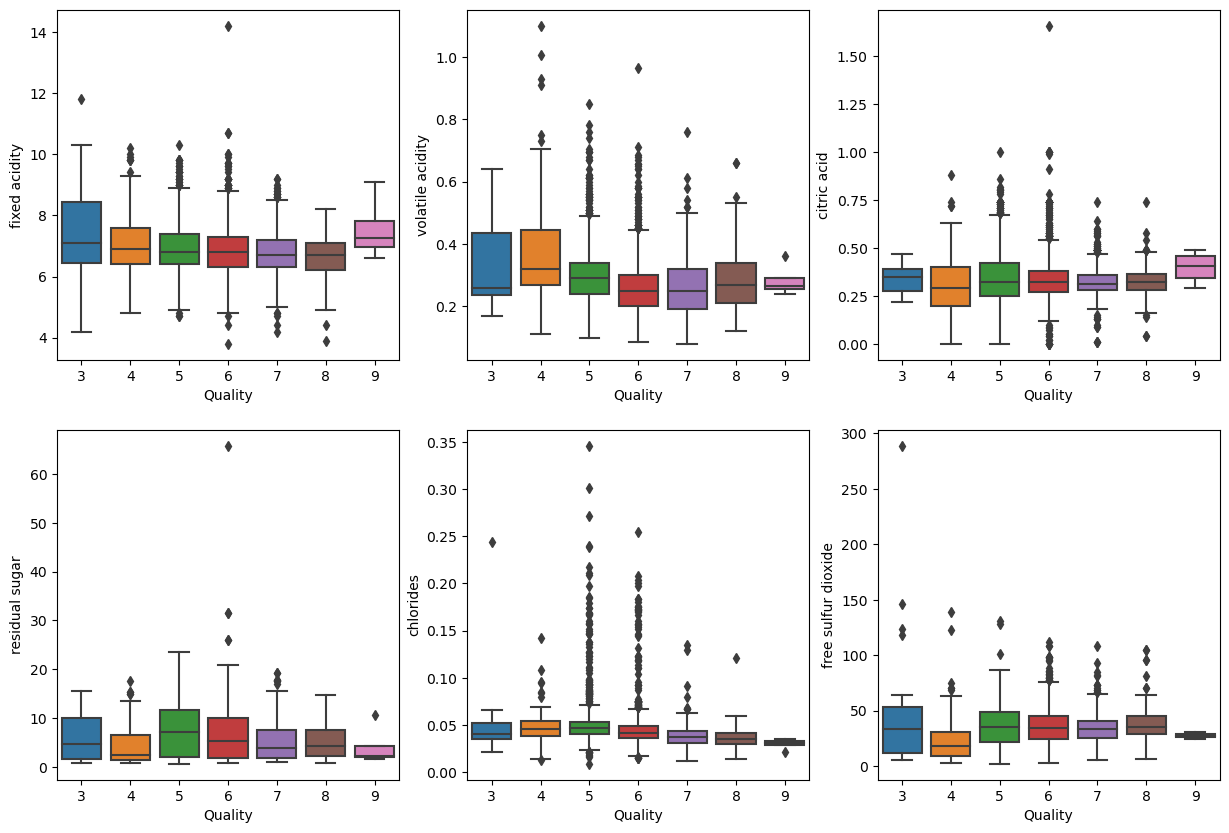

In [6]:
columns = train_data.columns[1:-1].tolist()
fig, ax1 = plt.subplots(2, 3, figsize=(15, 10))
k = 0
for i in range(2):
    for j in range(3):
        if k != 11:
            sns.boxplot(x=train_data['Quality'], y=train_data[columns[k]], ax=ax1[i][j])
            k += 1
plt.show()

In [7]:
X_train_v1 = X_train.copy()
X_train_v1.var(axis=0)

fixed acidity              0.709098
volatile acidity           0.010109
citric acid                0.014570
residual sugar            25.957759
chlorides                  0.000465
free sulfur dioxide      307.647639
total sulfur dioxide    1887.082966
density                    0.000009
pH                         0.022596
sulphates                  0.013377
alcohol                    1.545560
dtype: float64

In [8]:
norm = MinMaxScaler().fit(X_train_v1)
norm_X_train = norm.fit_transform(X_train_v1)
norm_X_test=norm.transform(X_test)
norm_X_train1=pd.DataFrame(norm_X_train,columns=X_train_v1.columns)
norm_X_train1.var(axis=0)

fixed acidity           0.006556
volatile acidity        0.009716
citric acid             0.005288
residual sugar          0.006106
chlorides               0.004091
free sulfur dioxide     0.003735
total sulfur dioxide    0.010206
density                 0.003440
pH                      0.020110
sulphates               0.018087
alcohol                 0.042226
dtype: float64

# Variance threshold

In [9]:
threshold = 0.008  # Variance threshold value
selector = VarianceThreshold(threshold=threshold)
X_var = selector.fit_transform(norm_X_train)
X_var_test=selector.transform(norm_X_test)

In [10]:
model = RandomForestClassifier()
model.fit(X_var,y_train)
y_pred=model.predict(X_var_test)

In [11]:
f_score = f1_score(y_test, y_pred, average='macro')
print("F-score:", f_score)

F-score: 0.34685778337105994


In [12]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0   1   3   2   0   0   0]
 [  0   9  17  15   0   0   0]
 [  0   3 225 119   6   0   0]
 [  0   4  83 391  46   2   0]
 [  0   1   5  94 113   3   0]
 [  0   0   0  22  14   6   0]
 [  0   0   0   1   0   0   0]]


# Feature selection using SelectKBest

In [13]:
k = 5  # Number of best features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(norm_X_train,y_train)
X_new_test=selector.transform(norm_X_test)

In [14]:
model =MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam')
model.fit(X_new,y_train)
y_pred=model.predict(X_new_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
f_score = f1_score(y_test, y_pred, average='macro')
print("F-score:", f_score)

F-score: 0.25512492947451026


In [16]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0   0   4   2   0   0   0]
 [  0   5  18  17   1   0   0]
 [  0   4 178 167   4   0   0]
 [  0   2  84 402  38   0   0]
 [  0   0   7 138  71   0   0]
 [  0   0   1  28  13   0   0]
 [  0   0   0   1   0   0   0]]


# Recursive Feature Elimination (RFE)

In [17]:
model = GradientBoostingClassifier()  # Choose an appropriate ML model
rfe = RFE(estimator=model, n_features_to_select=k)
X_rfe = rfe.fit_transform(norm_X_train,y_train)
X_rfe_test=selector.transform(norm_X_test)

In [18]:
model = GradientBoostingClassifier()
model.fit(X_rfe,y_train)
y_pred=model.predict(X_rfe_test)

In [19]:
f_score = f1_score(y_test, y_pred, average='macro')
print("F-score:", f_score)

F-score: 0.19633223177725473


In [20]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0   2   3   1   0   0   0]
 [  0   6  28   7   0   0   0]
 [ 49  14 222  67   0   1   0]
 [ 65  24 180 254   3   0   0]
 [ 24   8  35 128  20   1   0]
 [  6   1  10  20   4   1   0]
 [  0   0   0   1   0   0   0]]


# RFECV

In [21]:
classifier = RandomForestClassifier()
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(5), scoring='f1_macro')
X_rfecv_train=rfecv.fit_transform(norm_X_train,y_train)
X_rfecv_test=rfecv.transform(norm_X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [22]:
print("Selected features:", norm_X_train1.columns[rfecv.support_])

Selected features: Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


In [23]:
model = RandomForestClassifier()
model.fit(X_rfecv_train,y_train)
y_pred=model.predict(X_rfecv_test)

In [24]:
f_score = f1_score(y_test, y_pred, average='macro')
print("F-score:", f_score)

F-score: 0.36059469728232585


In [25]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0   0   3   3   0   0   0]
 [  0   9  19  12   1   0   0]
 [  0   2 240 108   3   0   0]
 [  0   0  96 398  30   2   0]
 [  0   0   8  99 109   0   0]
 [  0   0   0  27   9   6   0]
 [  0   0   0   1   0   0   0]]


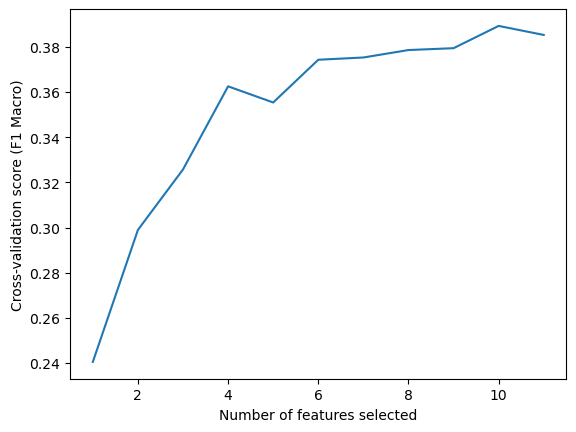

In [26]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (F1 Macro)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Creating File

In [27]:
X = train_data.drop(['ID','Quality'], axis=1)
X_test=test_data.drop(['ID'],axis=1)
y = train_data['Quality']

In [28]:
norm = StandardScaler()
norm_X_train = norm.fit_transform(X)
norm_X_test=norm.transform(X_test)

In [29]:
# Define the base estimators
svc_model = SVC(C=5.0, kernel='rbf', gamma=2.2)
mlp_model = MLPClassifier(hidden_layer_sizes=(400, 200), activation='tanh', solver='adam', learning_rate='constant', 
                          learning_rate_init=0.006, max_iter=400, random_state=6)
gb_model = GradientBoostingClassifier()
rf_model=AdaBoostClassifier()
# Define the final estimator
#final_estimator = KNeighborsClassifier()
#final_estimator = RandomForestClassifier() (Best Version)
final_estimator = RandomForestClassifier()
# Create the stacking classifier
estimators = [('svc', svc_model), ('mlp', mlp_model), ('gb', gb_model),('rf', rf_model)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Fit the stacking classifier
stacking_model.fit(norm_X_train, y)

# Make predictions
y_pred = stacking_model.predict(norm_X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [30]:
submission = pd.DataFrame({"ID": test_data["ID"], "Quality": y_pred})
submission.to_csv("submission.csv", index=False)